<a href="https://colab.research.google.com/github/sureshmecad/Google-Colab/blob/master/1_Outlier_Standard_Deviation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- In statistics, If a **data distribution** is approximately **normal** then,

 - about **68%** of the data values lie within **one standard deviation** of the mean
 
 - about **95%** are within **two standard deviations**
 
 - about **99.7%** lie within **three standard deviations**

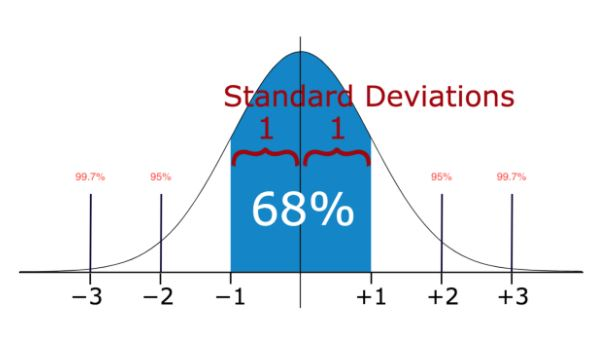

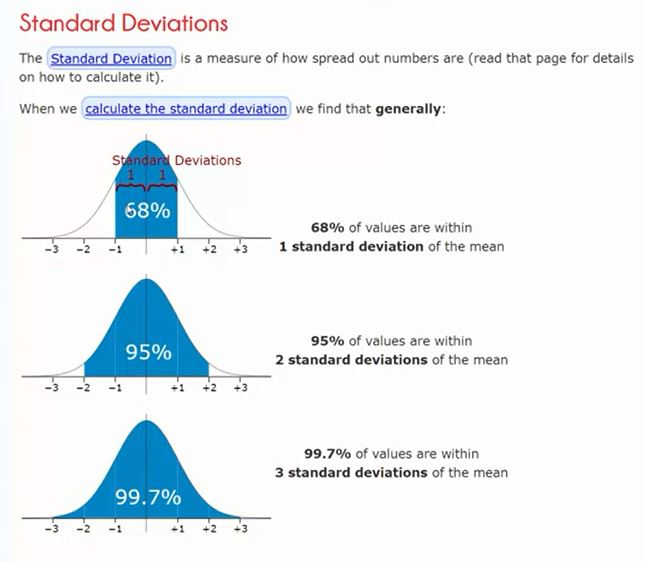

- Therefore, if you have any **data point** that is **more than 3 times** the **standard deviation**, then those points are very likely to be **anomalous or outliers.**

---------------------------------------

### **Example : Titanic**

In [7]:
import numpy as np
import pandas as pd

In [5]:
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic.csv


In [9]:
# read data
data = pd.read_csv("titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
data.shape

(891, 12)

In [12]:
# drop columns with condition that if our data has 70% or more than 70% of nan in it using dropna thesh attribute.
data = data.dropna(thresh=0.7*len(data), axis=1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
data.shape

(891, 11)

In [14]:
# Filling missing values with medians of Age column
data['Age'] = data['Age'].fillna(data['Age'].median())

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:
# lets impute nan in column Embarked with maximum occured values in it. 
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
#check total count of nan again in each feature
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
# Lets define our factor=3 as our factor to calculate our limit
factor = 3

# Calculate upper limit and lower limit  of 'Fare' column to decide the threshold to detect outlier
#Hint use: upper_lim=mean+std*factor
#          loeer_lim=mean-std*factor

upper_lim = data['Fare'].mean() + data['Fare'].std()*factor
lower_lim = data['Fare'].mean() - data['Fare'].std()*factor

In [17]:
#Now filter our 'Fare' with data lower than upper_lim and greater than lower_lim
new_data = data[(data['Fare']>upper_lim) | (data['Fare']<lower_lim)]

#print the length of original and new data
print('Length of orignial data:', len(data))
print('Length of new data:', len(data)-len(new_data))

Length of orignial data: 891
Length of new data: 871


----------------------------------------

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import seed
seed(1)


# multiply and add by random numbers to get some real values
data = np.random.randn(50000)  * 20 + 20

# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(data):
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    random_data_std = std(random_data)
    random_data_mean = mean(random_data)
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    print(lower_limit)
    # Generate outliers
    for outlier in random_data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

find_anomalies(data)

NameError: ignored

- The output of this code is a list of values above 80 and below -40

In [4]:
# identify outliers with standard deviation
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std

# seed the random number generator
seed(1)

# generate univariate observations
data = 5 * randn(10000) + 50

# calculate summary statistics
data_mean, data_std = mean(data), std(data)

# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 29
Non-outlier observations: 9971
